In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #adjusts the dimensions of the plots 

In [2]:
#reading in data
df=pd.read_csv(r'Downloads/movies.csv',encoding='ANSI')

In [3]:
#exploring data starts
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
#checking for missing values 
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

budget-0.0%
company-0.0%
country-0.0%
director-0.0%
genre-0.0%
gross-0.0%
name-0.0%
rating-0.0%
released-0.0%
runtime-0.0%
score-0.0%
star-0.0%
votes-0.0%
writer-0.0%
year-0.0%


In [5]:
#checking the datatypes
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [6]:
#changing the data type to drop the decimal 
df['budget'] =df['budget'].astype('int64')

df['gross']=df['gross'].astype('int64')

In [7]:
#correcting the year column and dropping the previous one
df['year_of_release']=df['released'].astype('str').str[:4]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_of_release
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [8]:
#sorting data by gross revenue (highest to lowest)

df.sort_values(by=['gross'],inplace=False,ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_of_release
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [9]:
#dropping duplicates value if any

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_of_release
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016


Text(0, 0.5, 'Gross earnings of movie')

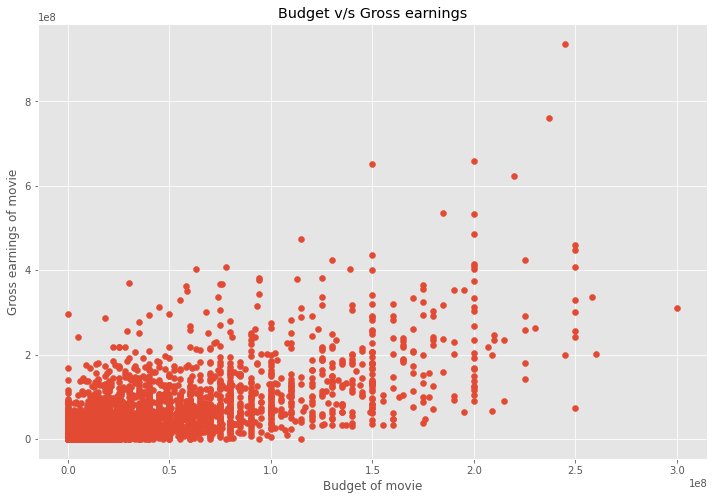

In [10]:
#checking for correlations
#Scatterplot of budget v/s gross

plt.scatter(x=df['budget'],y=df['gross']) 
plt.title('Budget v/s Gross earnings')
plt.xlabel('Budget of movie')
plt.ylabel('Gross earnings of movie')

Text(0, 0.5, 'Gross earnings of movie')

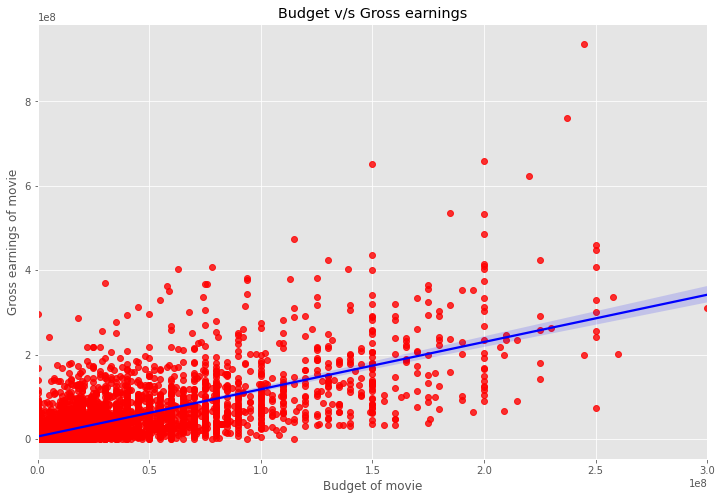

In [25]:
#budget v/s gross regression 

sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

plt.title('Budget v/s Gross earnings')
plt.xlabel('Budget of movie')
plt.ylabel('Gross earnings of movie')

In [12]:
#exploring the correlation 

df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


Text(87.0, 0.5, 'Movie features')

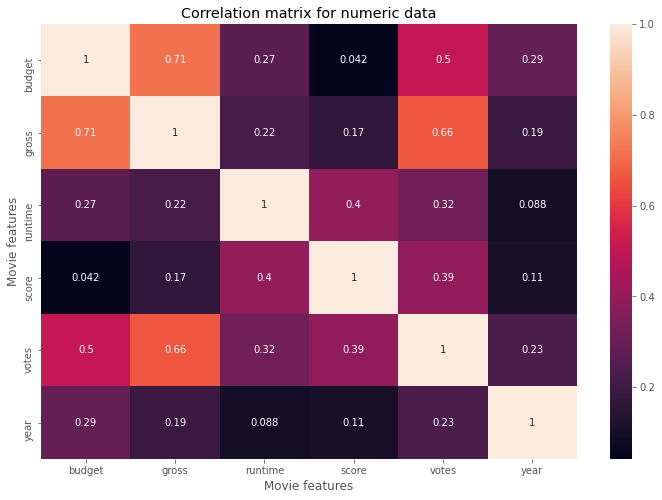

In [24]:
correlation_matrix=df.corr()

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation matrix for numeric data')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

In [14]:
#checking correlation with company name but since it is a string, we have to convert it to numeric data

df_numeric=df.copy()
for col_name in df_numeric.columns:
    if(df_numeric[col_name].dtype=='object'):
        df_numeric[col_name]=df_numeric[col_name].astype('category')
        df_numeric[col_name]=df_numeric[col_name].cat.codes
        
df_numeric

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_of_release
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,2335,91,5.4,1066,9161,1800,2016,30
6816,0,1914,54,1989,6,28368,3430,7,2320,90,4.9,2146,1959,3008,2016,30
6817,3500000,2124,54,2313,2,3775000,577,8,2336,76,6.5,1355,36333,450,2016,30
6818,0,415,54,1914,6,25981,5272,8,2361,76,6.2,1370,6947,2946,2016,30


Text(86.09375, 0.5, 'Movie features')

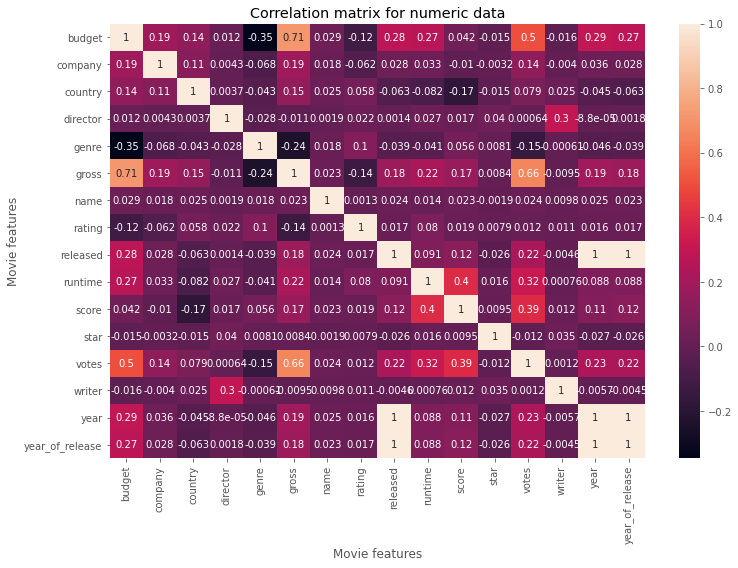

In [23]:
correlation_matrix=df_numeric.corr()

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation matrix for numeric data')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

In [16]:
correlation_mat=df_numeric.corr()
corr_pairs=correlation_mat.unstack()
pd.set_option('display.max_rows',None)
corr_pairs

budget           budget             1.000000
                 company            0.187205
                 country            0.137635
                 director           0.011602
                 genre             -0.346794
                 gross              0.712196
                 name               0.028712
                 rating            -0.119660
                 released           0.276635
                 runtime            0.268226
                 score              0.042145
                 star              -0.015061
                 votes              0.503924
                 writer            -0.015611
                 year               0.291009
                 year_of_release    0.274820
company          budget             0.187205
                 company            1.000000
                 country            0.107950
                 director           0.004320
                 genre             -0.068330
                 gross              0.187220
          

In [17]:
sorted_pairs=corr_pairs.sort_values()

sorted_pairs

genre            budget            -0.346794
budget           genre             -0.346794
gross            genre             -0.242676
genre            gross             -0.242676
score            country           -0.174414
country          score             -0.174414
votes            genre             -0.150519
genre            votes             -0.150519
rating           gross             -0.135538
gross            rating            -0.135538
budget           rating            -0.119660
rating           budget            -0.119660
country          runtime           -0.081796
runtime          country           -0.081796
genre            company           -0.068330
company          genre             -0.068330
country          year_of_release   -0.062707
year_of_release  country           -0.062707
country          released          -0.062609
released         country           -0.062609
rating           company           -0.062250
company          rating            -0.062250
year      

In [18]:
sorted_pairs[(sorted_pairs)>0.5]

votes            budget             0.503924
budget           votes              0.503924
votes            gross              0.662457
gross            votes              0.662457
                 budget             0.712196
budget           gross              0.712196
released         year               0.996187
year             released           0.996187
year_of_release  year               0.996229
year             year_of_release    0.996229
year_of_release  released           0.999389
released         year_of_release    0.999389
budget           budget             1.000000
writer           writer             1.000000
votes            votes              1.000000
star             star               1.000000
score            score              1.000000
runtime          runtime            1.000000
released         released           1.000000
rating           rating             1.000000
name             name               1.000000
gross            gross              1.000000
genre     

In [19]:
#budget and votes have the most correlation to gross earnings of movie 